In [3]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import missingno as msno 
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel(r"C:\Users\moham\Downloads\Hostel_Dataset.xlsx")
df

,Total Cost,Room Costs,Ship BoardExpenses,Casino Expenses,Excursion Expenses,Room Type,Customer Satisfaction Average of All Questions,Overall Trip 1-5 Satisfaction,Would you travel with us again?
0,2513.1275,910.9364,912.3840,405.5781,284.2290,Balcony,5.0,5,Yes
1,2417.3518,742.8454,857.6568,476.8440,340.0056,Balcony,3.1,3,Yes
2,2315.6382,747.2586,816.7500,507.6540,243.9756,Balcony,5.0,5,Yes
3,2291.4427,889.0651,790.8714,493.1022,118.4040,Balcony,4.5,5,Yes
4,2244.2013,753.8784,749.4795,485.4234,255.4200,Balcony,5.0,5,Yes
...,...,...,...,...,...,...,...,...,...
1045,516.8057,488.7960,45.4608,-71.1711,53.7200,Window,1.9,2,No
1046,482.0293,433.1452,168.4980,-146.3949,26.7810,Window,2.3,2,No
1047,412.7553,528.5239,53.9550,-187.5776,17.8540,Window,2.9,3,No
1048,379.7558,404.8966,148.9752,-219.7780,45.6620,Window,3.7,4,No


# Data Investigation and Cleaning 

In [7]:
df.sample(7,random_state=7)

,Total Cost,Room Costs,Ship BoardExpenses,Casino Expenses,Excursion Expenses,Room Type,Customer Satisfaction Average of All Questions,Overall Trip 1-5 Satisfaction,Would you travel with us again?
397,1057.9100,315.210,567.2700,79.6500,91.6400,Interior,4.8,5,Yes
582,745.9500,303.240,133.6500,-126.2600,213.3000,Interior,4.3,4,Yes
389,1071.1800,375.060,503.9100,286.1500,168.2700,Interior,2.8,3,No
361,1132.2600,279.300,524.7000,54.8700,208.5600,Interior,3.3,3,No
898,1042.2319,472.397,170.4978,245.2634,154.0737,Window,2.9,3,No
1028,652.1300,497.260,34.6500,506.3900,88.4800,Window,1.4,1,No
743,1469.9600,1052.100,129.6900,690.0300,171.2700,Suite,2.5,3,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Total Cost                                      1050 non-null   float64
 1   Room Costs                                      1050 non-null   float64
 2   Ship BoardExpenses                              1050 non-null   float64
 3   Casino Expenses                                 1050 non-null   float64
 4   Excursion Expenses                              1050 non-null   float64
 5   Room Type                                       1050 non-null   object 
 6   Customer Satisfaction Average of All Questions  1050 non-null   float64
 7   Overall Trip 1-5 Satisfaction                   1050 non-null   int64  
 8   Would you travel with us again?                 1050 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory 

<Axes: >

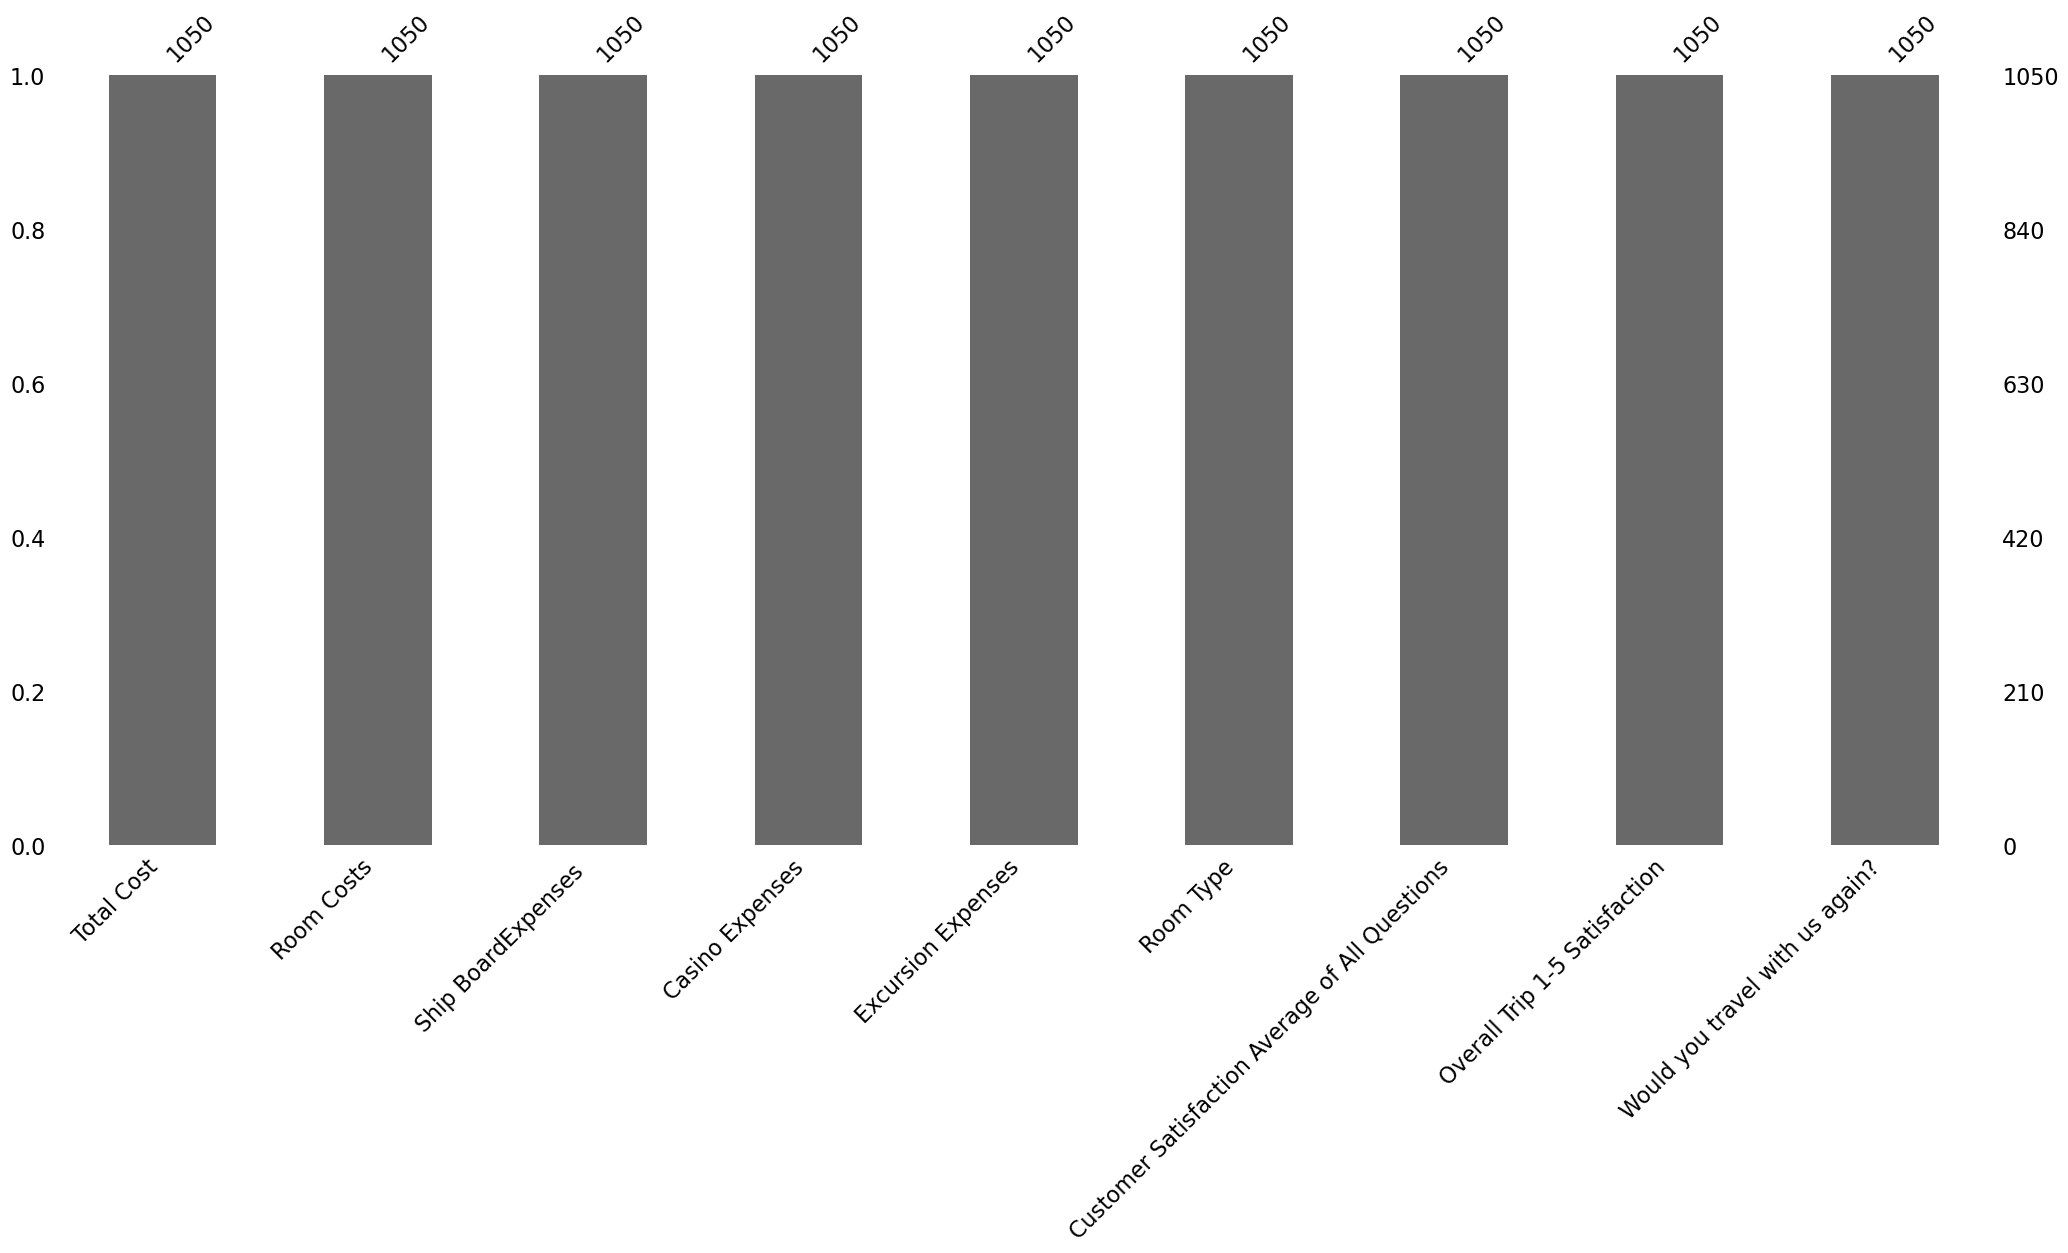

In [11]:
msno.bar(df)

In [49]:
df.isnull().sum() * 100 / len(df)

Total Cost                                        0.0
Room Costs                                        0.0
Ship BoardExpenses                                0.0
Casino Expenses                                   0.0
Excursion Expenses                                0.0
Room Type                                         0.0
Customer Satisfaction Average of All Questions    0.0
Overall Trip 1-5 Satisfaction                     0.0
Would you travel with us again?                   0.0
dtype: float64

In [17]:
df.duplicated().value_counts()

False    1050
Name: count, dtype: int64

In [51]:
df.describe()

,Total Cost,Room Costs,Ship BoardExpenses,Casino Expenses,Excursion Expenses,Customer Satisfaction Average of All Questions,Overall Trip 1-5 Satisfaction
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,1127.041196,528.122936,388.822679,130.452392,149.626436,3.438381,3.469524
std,374.444832,235.103509,227.660449,211.962097,94.774713,1.220786,1.247887
min,306.066800,271.320000,1.980000,-286.110000,0.000000,0.500000,1.000000
25%,868.885000,351.120000,196.020000,-52.417500,71.234300,2.400000,2.000000
50%,1073.940000,486.680000,381.645000,110.600000,143.843200,3.400000,3.000000
75%,1322.461875,616.179200,583.961400,307.370000,219.809600,4.700000,5.000000
max,2823.501600,1559.446000,958.320000,779.733900,407.622600,5.000000,5.000000


In [25]:
df.dtypes

Total Cost                                        float64
Room Costs                                        float64
Ship BoardExpenses                                float64
Casino Expenses                                   float64
Excursion Expenses                                float64
Room Type                                          object
Customer Satisfaction Average of All Questions    float64
Overall Trip 1-5 Satisfaction                       int64
Would you travel with us again?                    object
dtype: object

In [45]:
df.head()

,Total Cost,Room Costs,Ship BoardExpenses,Casino Expenses,Excursion Expenses,Room Type,Customer Satisfaction Average of All Questions,Overall Trip 1-5 Satisfaction,Would you travel with us again?
0,2513.1275,910.9364,912.3840,405.5781,284.2290,Balcony,5.0,5,Yes
1,2417.3518,742.8454,857.6568,476.8440,340.0056,Balcony,3.1,3,Yes
2,2315.6382,747.2586,816.7500,507.6540,243.9756,Balcony,5.0,5,Yes
3,2291.4427,889.0651,790.8714,493.1022,118.4040,Balcony,4.5,5,Yes
4,2244.2013,753.8784,749.4795,485.4234,255.4200,Balcony,5.0,5,Yes


In [63]:
df.rename(columns={'Total Cost' : 'Total_Cost' ,  'Room Costs'  : 'Room_costs'   , 'Ship BoardExpenses ' : 'ShipBoard_Expenses',
                   'Casino Expenses' : 'Casino_expenses' , 'Excursion Expenses' : 'Excursion_expenses' , 'Room Type' : 'Room_type',
                   'Customer Satisfaction Average of All Questions' : 'Customersatisfaction_average',
                   'Overall Trip 1-5 Satisfaction' : 'TotalCustomer_satisfaction',
                   'Would you travel with us again?' : 'Travel_again'
                  }, inplace=True)

In [65]:
df.head()

,Total_Cost,Room_costs,ShipBoard_Expenses,Casino_expenses,Excursion_expenses,Room_type,Customersatisfaction_average,TotalCustomer_satisfaction,Travel_again
0,2513.1275,910.9364,912.3840,405.5781,284.2290,Balcony,5.0,5,Yes
1,2417.3518,742.8454,857.6568,476.8440,340.0056,Balcony,3.1,3,Yes
2,2315.6382,747.2586,816.7500,507.6540,243.9756,Balcony,5.0,5,Yes
3,2291.4427,889.0651,790.8714,493.1022,118.4040,Balcony,4.5,5,Yes
4,2244.2013,753.8784,749.4795,485.4234,255.4200,Balcony,5.0,5,Yes


In [69]:
num_cols=df.select_dtypes(include= ['float' , 'int'])
num_cols

,Total_Cost,Room_costs,ShipBoard_Expenses,Casino_expenses,Excursion_expenses,Customersatisfaction_average,TotalCustomer_satisfaction
0,2513.1275,910.9364,912.3840,405.5781,284.2290,5.0,5
1,2417.3518,742.8454,857.6568,476.8440,340.0056,3.1,3
2,2315.6382,747.2586,816.7500,507.6540,243.9756,5.0,5
3,2291.4427,889.0651,790.8714,493.1022,118.4040,4.5,5
4,2244.2013,753.8784,749.4795,485.4234,255.4200,5.0,5
...,...,...,...,...,...,...,...
1045,516.8057,488.7960,45.4608,-71.1711,53.7200,1.9,2
1046,482.0293,433.1452,168.4980,-146.3949,26.7810,2.3,2
1047,412.7553,528.5239,53.9550,-187.5776,17.8540,2.9,3
1048,379.7558,404.8966,148.9752,-219.7780,45.6620,3.7,4


In [75]:
cat_cols=df.select_dtypes(include=['object' , 'category'])
cat_cols

,Room_type,Travel_again
0,Balcony,Yes
1,Balcony,Yes
2,Balcony,Yes
3,Balcony,Yes
4,Balcony,Yes
...,...,...
1045,Window,No
1046,Window,No
1047,Window,No
1048,Window,No


In [77]:
df['Casino_expenses']

0       405.5781
1       476.8440
2       507.6540
3       493.1022
4       485.4234
          ...   
1045    -71.1711
1046   -146.3949
1047   -187.5776
1048   -219.7780
1049   -186.3215
Name: Casino_expenses, Length: 1050, dtype: float64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Total_Cost                    1050 non-null   float64
 1   Room_costs                    1050 non-null   float64
 2   ShipBoard_Expenses            1050 non-null   float64
 3   Casino_expenses               1050 non-null   float64
 4   Excursion_expenses            1050 non-null   float64
 5   Room_type                     1050 non-null   object 
 6   Customersatisfaction_average  1050 non-null   float64
 7   TotalCustomer_satisfaction    1050 non-null   int64  
 8   Travel_again                  1050 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 74.0+ KB


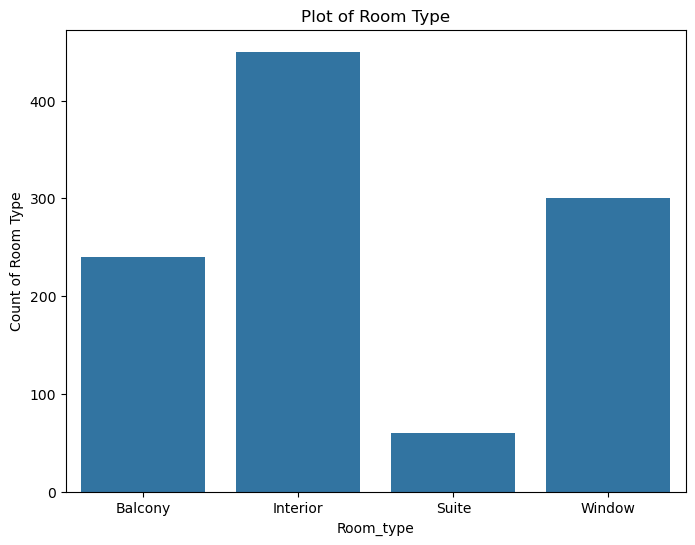

In [87]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Room_type' , data =cat_cols)
plt.title('Plot of Room Type')
plt.xlabel('Room_type')
plt.ylabel('Count of Room Type')
plt.show()

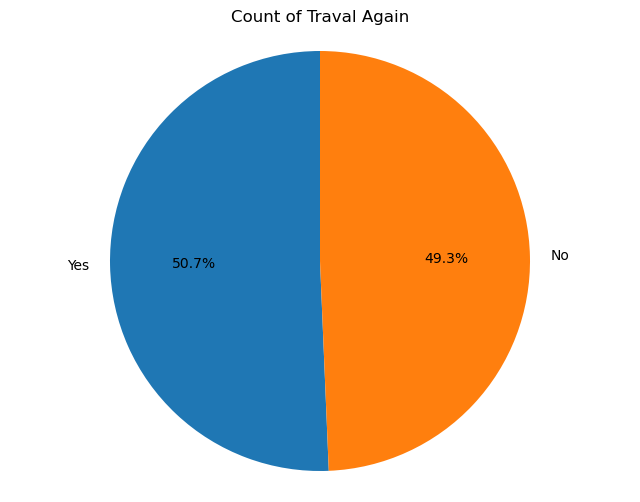

In [89]:
travel_counts = cat_cols['Travel_again'].value_counts()
plt.figure(figsize = (8,6))
plt.pie(travel_counts , labels= travel_counts.index , autopct = '%1.1f%%' , startangle = 90 )
plt.title('Count of Traval Again')
plt.axis('equal')
plt.show()

In [91]:
df.columns

Index(['Total_Cost', 'Room_costs', 'ShipBoard_Expenses', 'Casino_expenses',
       'Excursion_expenses', 'Room_type', 'Customersatisfaction_average',
       'TotalCustomer_satisfaction', 'Travel_again'],
      dtype='object')

In [95]:
total_cost_by_roomtype=df.groupby('Room_type')['Total_Cost'].sum()
total_cost_by_roomtype

Room_type
Balcony     326819.4039
Interior    428786.9500
Suite       109142.0903
Window      318644.8114
Name: Total_Cost, dtype: float64

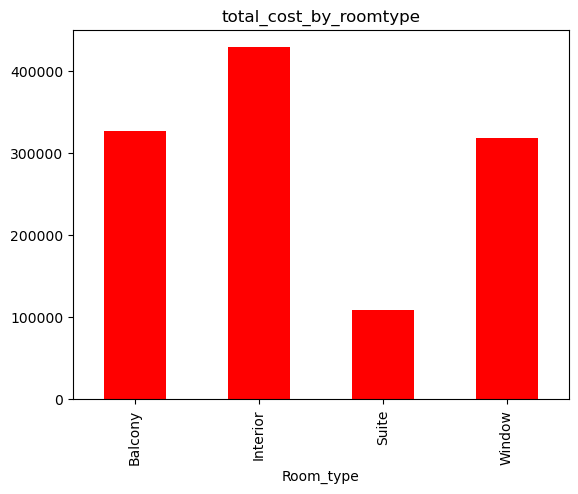

In [129]:
total_cost_by_roomtype.plot(kind='bar' , color = 'red')
plt.title('total_cost_by_roomtype')
plt.show()

In [105]:
Shipexpenses_roomtype =df.groupby('Room_type')['ShipBoard_Expenses'].sum()
Shipexpenses_roomtype 

Room_type
Balcony      97339.6710
Interior    177868.3500
Suite        21270.6351
Window      111785.1570
Name: ShipBoard_Expenses, dtype: float64

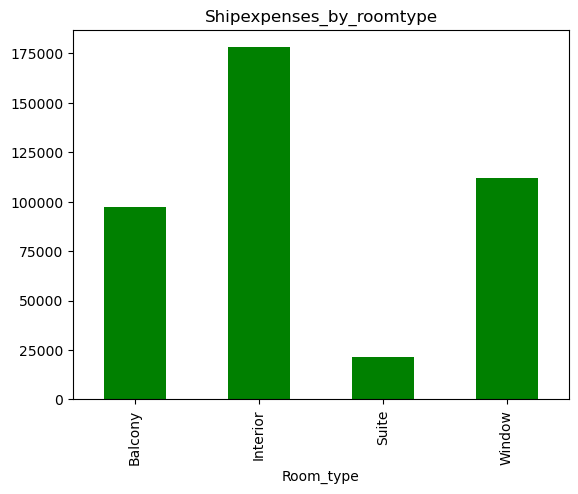

In [119]:
Shipexpenses_roomtype.plot(kind='bar' , color ='green' )
plt.title('Shipexpenses_by_roomtype')
plt.show()

In [109]:
df.columns

Index(['Total_Cost', 'Room_costs', 'ShipBoard_Expenses', 'Casino_expenses',
       'Excursion_expenses', 'Room_type', 'Customersatisfaction_average',
       'TotalCustomer_satisfaction', 'Travel_again'],
      dtype='object')

In [113]:
Roomcost_by_roomtype=df.groupby('Room_type')['Room_costs'].sum()
Roomcost_by_roomtype

Room_type
Balcony     172597.6560
Interior    153108.2700
Suite        72884.6951
Window      155938.4613
Name: Room_costs, dtype: float64

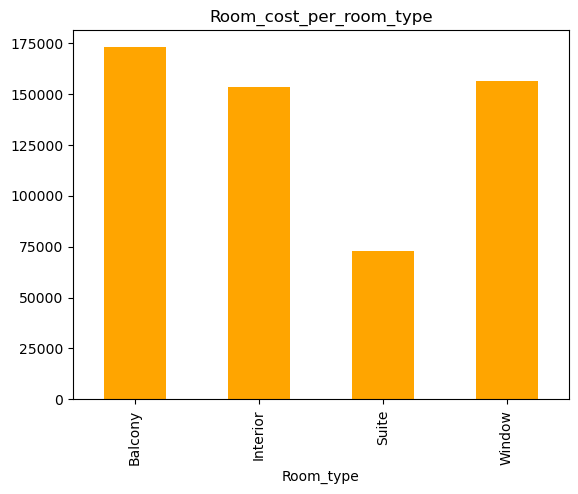

In [117]:
Roomcost_by_roomtype.plot(kind='bar' , color= 'orange' )
plt.title('Room_cost_per_room_type')
plt.show()

In [133]:
Average_customer_satisfaction=df.groupby('Travel_again')['Customersatisfaction_average'].mean()
Average_customer_satisfaction

Travel_again
No     2.406564
Yes    4.443045
Name: Customersatisfaction_average, dtype: float64

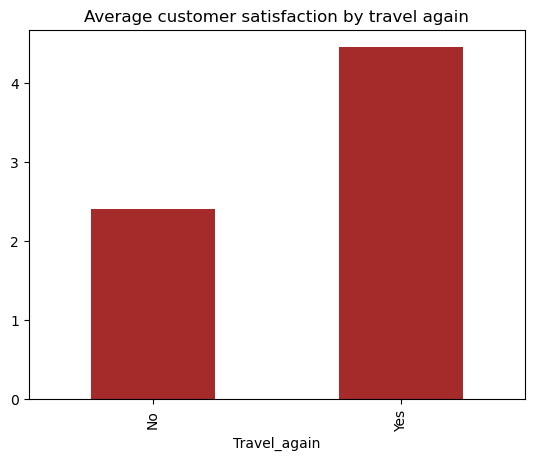

In [139]:
Average_customer_satisfaction.plot(kind='bar' , color='brown')
plt.title('Average customer satisfaction by travel again')
plt.show()

In [149]:
correlation_matrix = num_cols.corr()
correlation_matrix

,Total_Cost,Room_costs,ShipBoard_Expenses,Casino_expenses,Excursion_expenses,Customersatisfaction_average,TotalCustomer_satisfaction
Total_Cost,1.000000,0.626497,0.611533,0.283274,0.339775,0.344505,0.335272
Room_costs,0.626497,1.000000,-0.022847,0.082811,0.128696,0.013701,0.006873
ShipBoard_Expenses,0.611533,-0.022847,1.000000,0.068444,0.032852,0.486816,0.482522
Casino_expenses,0.283274,0.082811,0.068444,1.000000,-0.022238,-0.109133,-0.100400
Excursion_expenses,0.339775,0.128696,0.032852,-0.022238,1.000000,0.243325,0.222714
Customersatisfaction_average,0.344505,0.013701,0.486816,-0.109133,0.243325,1.000000,0.977428
TotalCustomer_satisfaction,0.335272,0.006873,0.482522,-0.100400,0.222714,0.977428,1.000000


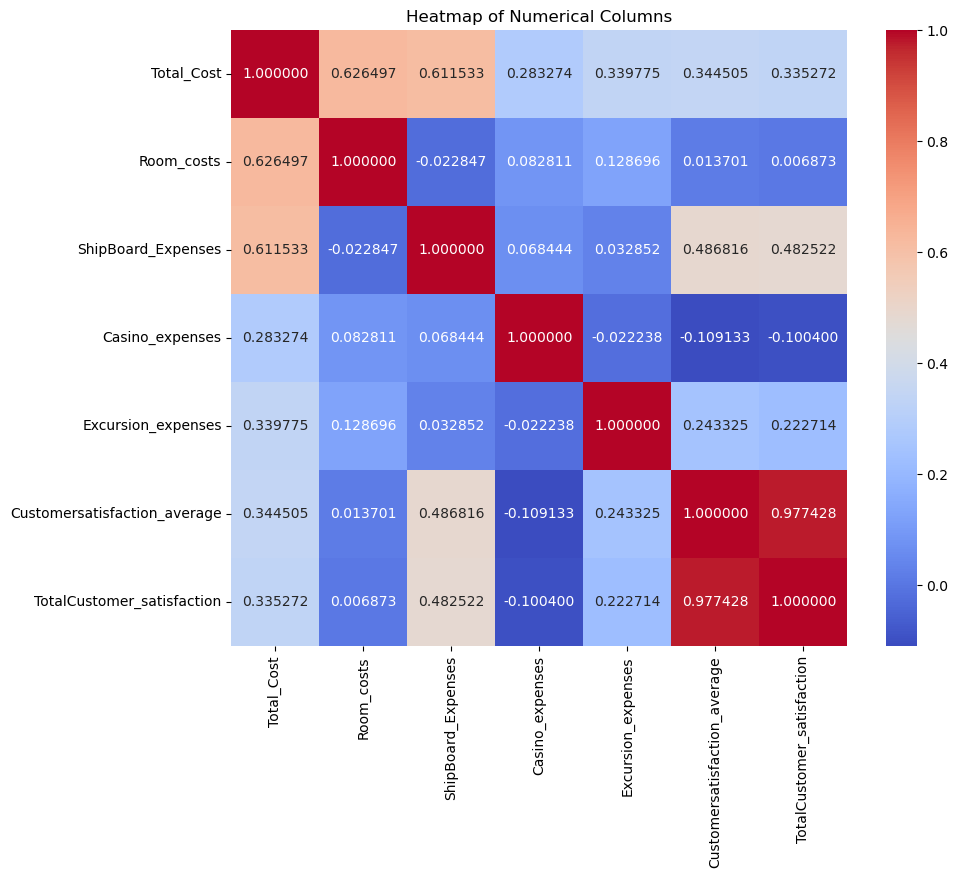

In [155]:
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix , annot = True , fmt = '2f'  , cmap = 'coolwarm' , square = True)
plt.title('Heatmap of Numerical Columns')
plt.show()

In [157]:
df1 = pd.concat([num_cols, cat_cols], axis = 1)
df1

,Total_Cost,Room_costs,ShipBoard_Expenses,Casino_expenses,Excursion_expenses,Customersatisfaction_average,TotalCustomer_satisfaction,Room_type,Travel_again
0,2513.1275,910.9364,912.3840,405.5781,284.2290,5.0,5,Balcony,Yes
1,2417.3518,742.8454,857.6568,476.8440,340.0056,3.1,3,Balcony,Yes
2,2315.6382,747.2586,816.7500,507.6540,243.9756,5.0,5,Balcony,Yes
3,2291.4427,889.0651,790.8714,493.1022,118.4040,4.5,5,Balcony,Yes
4,2244.2013,753.8784,749.4795,485.4234,255.4200,5.0,5,Balcony,Yes
...,...,...,...,...,...,...,...,...,...
1045,516.8057,488.7960,45.4608,-71.1711,53.7200,1.9,2,Window,No
1046,482.0293,433.1452,168.4980,-146.3949,26.7810,2.3,2,Window,No
1047,412.7553,528.5239,53.9550,-187.5776,17.8540,2.9,3,Window,No
1048,379.7558,404.8966,148.9752,-219.7780,45.6620,3.7,4,Window,No
